<a href="https://colab.research.google.com/github/Ashishverma66/Machine-learning-Notebooks/blob/main/CNN_Cat_VS_Dog_Model_2_4K_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Data from Kaggle using kaggle API, and Creating CNN model

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:08<00:00, 126MB/s]
100% 1.06G/1.06G [00:08<00:00, 139MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#We are going to use "generators" here which will convert the data into smaller size for efficient data procressing
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process (image, label):
  image=tf.cast(image/255.,tf.float32)
  return image, label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [ ]:
#Creating CNN model

model= Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.5439 - loss: 3.5796 - val_accuracy: 0.5766 - val_loss: 0.6564
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.5864 - loss: 0.6877 - val_accuracy: 0.5882 - val_loss: 0.6565
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.6372 - loss: 0.6392 - val_accuracy: 0.6738 - val_loss: 0.6205
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.6780 - loss: 0.6044 - val_accuracy: 0.6462 - val_loss: 0.6274
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7309 - loss: 0.5458 - val_accuracy: 0.7380 - val_loss: 0.5570
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.7510 - loss: 0.5337 - val_accuracy: 0.7610 - val_loss: 0.5086
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7769 - loss: 0.4846 - val_accuracy: 0.7574 - val_loss: 0.5420
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.8005 - loss: 0.4438 - 

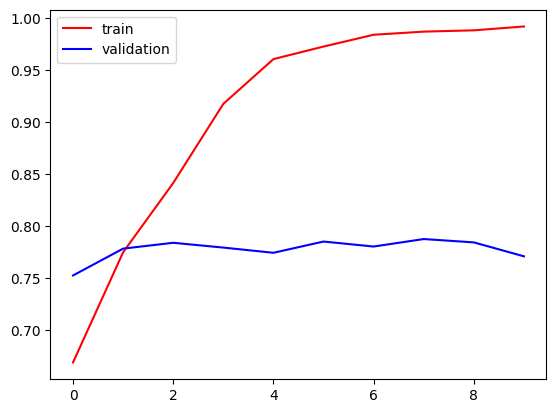

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='validation')
plt.legend()
plt.show()                    #This graph below shows that the model is overfitting

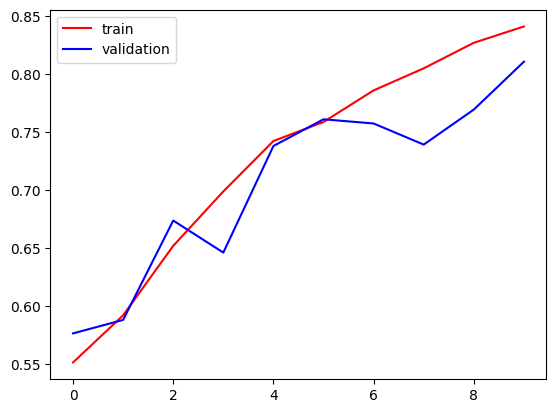

In [ ]:
#################### New accuracy graph after solving overfitting###################
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='validation')
plt.legend()
plt.show()

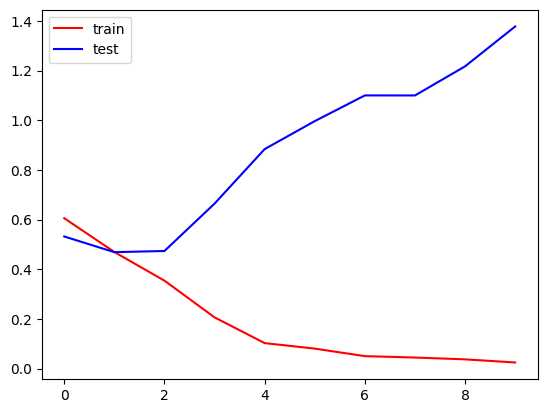

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()             #This graph below shows that the model is overfitting

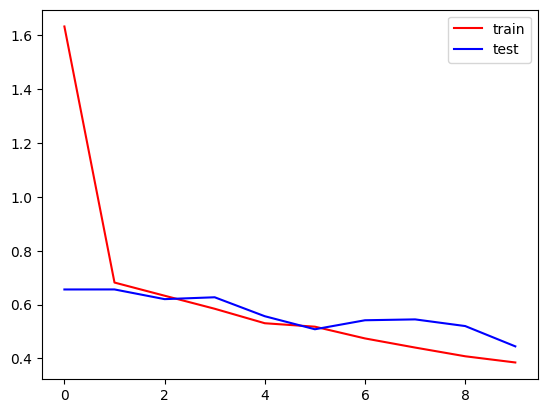

In [ ]:
###########################New loss graph after solving overfitting###########
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [ ]:
                                  ################NOTE######################
#Ways to reduce Overtitting are as follows

#Add more data
#Data Augmentation
#L1/L2 Regularizer
#Dropout
#Batch Norm
#Reduce complexity

# So, after finding out that the model is overfitted, we used Batchnormilization and Droup out tecnique to fix our model

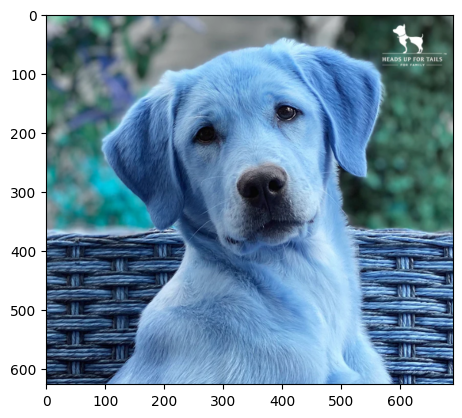

In [ ]:
################Time to test our model############
import cv2
test_img=cv2.imread('/content/dog.png')
plt.imshow(test_img)


In [ ]:
test_img.shape

(627, 690, 3)

In [ ]:
#we need to resize our image to (256,256) since we trained out model in the same dimension
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape(1,256,256,3) #this is converting our image to 4d tensor, it like saying we have one image wiht the following dimention


In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[1.]], dtype=float32)

In [ ]:
#1 is for Dog and 0 is for cat so the model is accurate

In [ ]:
#Note from Teacher##
# 1. CNN Architecture
# What it is: A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed for processing grid-like data, such as images.
# It consists of convolutional layers, pooling layers, and fully connected layers.

# Key Components:

# Convolutional layers extract features from the input image.
# Pooling layers reduce the spatial dimensions.
# Fully connected layers classify the extracted features.

# Example: The architecture used in the code above is a simple CNN with three convolutional layers, two pooling layers, and two fully connected layers.

# Alternatives: ResNet, VGG, Inception, EfficientNet (more complex architectures for advanced tasks).

# 2. Convolution Operation
# What it is: Convolution is a mathematical operation where a filter (kernel) slides over the input image to extract features like edges, textures, or patterns.
# Key Parameters:

# Filter size: The size of the kernel (e.g., 3x3).

# Stride: How many pixels the filter moves at a time.

# Padding: Adds zeros around the input to control the output size.

# Example: In the code, Conv2D(32, (3, 3)) uses 32 filters of size 3x3.

# Alternatives: Depthwise convolution, separable convolution (used in MobileNet).

# 3. ReLU Layer
# What it is: ReLU (Rectified Linear Unit) is an activation function defined as f(x) = max(0, x). It introduces non-linearity into the model, allowing it to learn complex patterns.

# Why it’s used: It is computationally efficient and helps mitigate the vanishing gradient problem.

# Example: In the code, activation='relu' is used in convolutional and dense layers.

# Alternatives: Leaky ReLU, ELU, Tanh, Sigmoid (other activation functions).

# 4. Pooling
# What it is: Pooling reduces the spatial dimensions of the feature maps, making the model computationally efficient and less prone to overfitting.

# Types:

# Max Pooling: Takes the maximum value in each window.

# Average Pooling: Takes the average value in each window.

# Example: In the code, MaxPooling2D((2, 2)) reduces the feature map size by half.

# Alternatives: Global Average Pooling (used in place of fully connected layers).

# 5. Flattening
# What it is: Flattening converts the multi-dimensional output of convolutional/pooling layers into a 1D vector, which can be fed into fully connected layers.

# Why it’s used: Fully connected layers require 1D input.

# Example: In the code, Flatten() converts the 3D output to 1D.

# Alternatives: Global Average Pooling (directly reduces spatial dimensions to 1D without flattening).

# 6. Full Connection (Dense Layer)
# What it is: Fully connected layers connect every neuron in one layer to every neuron in the next layer. They are used for classification based on the features extracted by convolutional layers.

# Why it’s used: To learn non-linear combinations of high-level features.

# Example: In the code, Dense(64, activation='relu') is a fully connected layer with 64 neurons.

# Alternatives: Dropout layers (to prevent overfitting), Batch Normalization (to stabilize training).

# 7. Softmax & Cross-Entropy
# What it is:

# Softmax: Converts the output of the last layer into probabilities for each class.

# Cross-Entropy: Measures the difference between the predicted probabilities and the true labels.

# Why it’s used: Softmax is used for multi-class classification, and cross-entropy is the standard loss function for such tasks.

# Example: In the code, Dense(10, activation='softmax') outputs probabilities for 10 classes, and loss='categorical_crossentropy' computes the loss.

# Alternatives:

# Softmax Alternatives: Sigmoid (for binary classification).

# Cross-Entropy Alternatives: Mean Squared Error (for regression tasks).

# 8. Optimizer
# What it is: An optimizer adjusts the model's weights to minimize the loss function during training.

# Popular Optimizers:

# Adam: Combines the benefits of RMSProp and Momentum. It is adaptive and works well for most tasks.

# SGD (Stochastic Gradient Descent): Basic optimizer that updates weights based on the gradient of the loss.

# RMSProp: Adapts the learning rate based on the magnitude of recent gradients.

# Adagrad: Adapts the learning rate for each parameter based on historical gradients.

# Example: In the code, optimizer='adam' is used.

# Alternatives: SGD, RMSProp, Adagrad, AdaDelta.